# Model-3 (Random Forest application for the dataset)

In [1]:
import pandas as pd
import numpy as np

# Importing the data

In [2]:
train_df=pd.read_csv('D:\Jio Term 2\ML\ML_Project\project_data\sepsis_training_data.csv')
test_df=pd.read_csv('D:\Jio Term 2\ML\ML_Project\project_data\sepsis_test_data.csv')
val_df=pd.read_csv('D:\Jio Term 2\ML\ML_Project\project_data\sepsis_validation_data.csv')

# Analyzing the data

In [3]:
pd.set_option('display.max_columns', None)
train_df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,61.0,99.0,36.44,124.0,65.0,43.0,17.5,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,1,0
1,61.0,99.0,36.44,124.0,65.0,43.0,17.5,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,2,0
2,64.0,98.0,36.44,125.0,64.0,41.0,27.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,3,0
3,56.0,100.0,36.44,123.0,65.0,41.0,9.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,4,0
4,66.0,99.0,36.22,120.0,67.0,43.0,23.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,5,0


In [4]:
#after imputation of missing values the columns which get the least unique values need to be dropped,hence we will check unique
# value count & drop those columns

columns_to_drop=[]
for column in train_df.columns:
    vc=len(train_df[column].value_counts().unique())
    if vc<=5:
         columns_to_drop.append(column)
    else:
        pass
print(columns_to_drop)


['EtCO2', 'Gender', 'Unit1', 'Unit2', 'SepsisLabel']


In [5]:
#here we cannot drop ['Gender','SepsisLabel']
items_to_remove=['Gender','SepsisLabel']
for column in columns_to_drop:
    if column in items_to_remove:
        columns_to_drop.remove(column)
    else:
        pass
print(columns_to_drop)

['EtCO2', 'Unit1', 'Unit2']


In [6]:
data=[train_df,test_df,val_df]

def drop_columns(df_list,col_list):
    for df in df_list:
        df.drop(col_list,axis=1,inplace=True)

In [7]:
drop_columns(data,columns_to_drop)

In [8]:
#now that we have dropped the unwanted columns, we will split the data into dependent & independent features
#here sepsis lable is the the dependent column




def dep_ind(df):
    
    
    X=np.array(df[df.columns[:-1]].values)
    y=np.array(df[df.columns[-1]].values)
    
    return X,y

# Splitting data into dependent & independent datasets

In [9]:
train_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
0,61.0,99.0,36.44,124.0,65.0,43.0,17.5,0.0,22.0,0.0,0.00,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,-98.60,1,0
1,61.0,99.0,36.44,124.0,65.0,43.0,17.5,0.0,22.0,0.0,0.00,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,-98.60,2,0
2,64.0,98.0,36.44,125.0,64.0,41.0,27.0,0.0,22.0,0.0,0.00,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,-98.60,3,0
3,56.0,100.0,36.44,123.0,65.0,41.0,9.0,0.0,22.0,0.0,0.00,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,-98.60,4,0
4,66.0,99.0,36.22,120.0,67.0,43.0,23.0,0.0,22.0,0.0,0.00,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,-98.60,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552457,88.0,98.0,38.72,135.0,81.0,64.0,16.0,2.0,26.0,0.5,7.48,34.0,97.0,90.0,26.0,107.0,8.3,102.0,2.5,0.0,205.0,1.6,2.2,3.5,3.9,0.9,0.0,27.8,10.6,33.4,11.8,0.0,284.0,62.29,1,-0.03,31,1
552458,96.0,98.0,38.72,174.0,97.0,72.0,16.0,2.0,26.0,0.5,7.48,34.0,97.0,90.0,26.0,107.0,8.3,102.0,2.5,0.0,205.0,1.6,2.2,3.5,3.9,0.9,0.0,27.8,10.6,33.4,11.8,0.0,284.0,62.29,1,-0.03,32,1
552459,140.0,97.0,38.72,133.0,81.5,62.5,16.0,2.0,26.0,0.5,7.48,34.0,97.0,90.0,26.0,107.0,8.3,102.0,2.5,0.0,205.0,1.6,2.2,3.5,3.9,0.9,0.0,27.8,10.6,33.4,11.8,0.0,284.0,62.29,1,-0.03,33,1
552460,120.0,96.0,38.72,154.0,118.0,105.0,16.0,2.0,26.0,0.5,7.48,34.0,98.0,90.0,26.0,107.0,8.3,102.0,2.5,0.0,205.0,1.6,2.2,3.5,3.9,0.9,0.0,27.8,10.6,33.4,11.8,0.0,284.0,62.29,1,-0.03,34,1


In [10]:
#since using randomforest algorithm , we will not scale down the features

X_feature = train_df.columns[:-1]
y_feature = train_df.columns[-1]

In [11]:
#divinding data into dependent & independent features

X_train=train_df[X_feature]
y_train=train_df[y_feature]

X_test=test_df[X_feature]
y_test=test_df[y_feature]

X_val=val_df[X_feature]
y_val=val_df[y_feature]



# RandomForest Application for classification

In [12]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


#now we will look at the most important features by running a random forest model

rf_classifier=RandomForestClassifier(n_estimators=9, max_features=37, criterion='gini', )
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_features=37, n_estimators=9)

In [13]:
rf_classifier

RandomForestClassifier(max_features=37, n_estimators=9)

Index(['ICULOS', 'Temp', 'Age', 'Glucose', 'Platelets', 'PTT', 'WBC', 'Hct',
       'HospAdmTime', 'HR', 'PaCO2', 'Potassium', 'BUN', 'SBP', 'Hgb',
       'Creatinine', 'Calcium', 'Phosphate', 'Magnesium', 'pH', 'Chloride',
       'Lactate', 'HCO3', 'Resp', 'BaseExcess', 'MAP', 'FiO2', 'DBP', 'AST',
       'Alkalinephos', 'O2Sat', 'Bilirubin_total', 'SaO2', 'Fibrinogen',
       'Bilirubin_direct', 'Gender', 'TroponinI'],
      dtype='object')

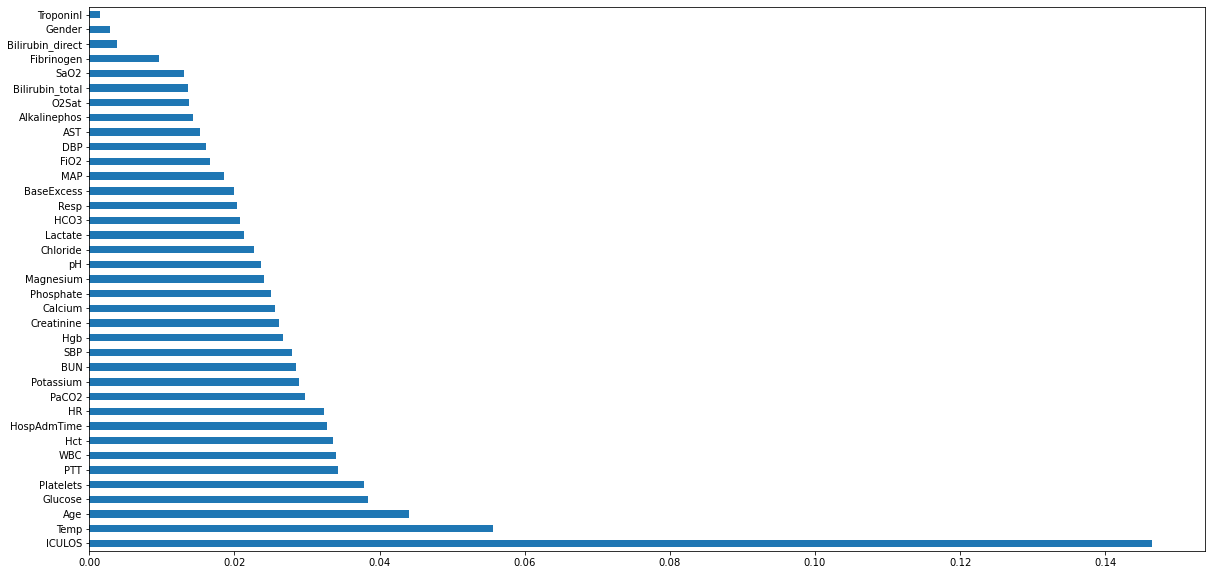

In [14]:
#not lets analyze the important features

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
rf_classifier.feature_importances_

features_imp=pd.Series(rf_classifier.feature_importances_, index=X_train.columns)
features_imp.nlargest(37).plot(kind='barh')

#Below we observe the features in ascending order with their importance

features_imp.sort_values(ascending=False).index



# Performance metrics

In [15]:
from sklearn.metrics import classification_report, auc, precision_recall_curve, roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix


y_pred=rf_classifier.predict(X_test)
confusion_matrix(y_test,y_pred)

#performance of confusion matrix is better on random forest when compared to logistic regression



array([[114632,   1051],
       [  2363,    272]], dtype=int64)

In [16]:
y_pred_prob=rf_classifier.predict_proba(X_test)[:,1]
precison,recall,threshold=precision_recall_curve(y_test,y_pred_prob)
area_under_curve = auc(recall, precison)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auroc = auc(fpr, tpr)

In [17]:
print(classification_report(y_test,y_pred))
print('f1score:', f1_score(y_test,y_pred))
print('Precision:', precision_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))
print('accuraccy:', accuracy_score(y_test,y_pred))
print('auc:',auroc)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    115683
           1       0.21      0.10      0.14      2635

    accuracy                           0.97    118318
   macro avg       0.59      0.55      0.56    118318
weighted avg       0.96      0.97      0.97    118318

f1score: 0.1374431531076301
Precision: 0.20559334845049132
Recall: 0.1032258064516129
accuraccy: 0.9711455568890617
auc: 0.7008595595950794


Text(0.5, 1.0, 'precision vs recall_randomforest')

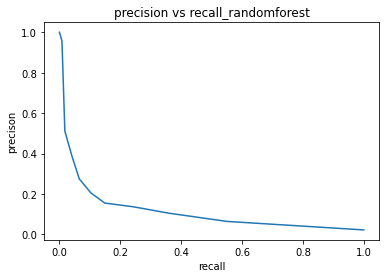

In [18]:
plt.plot(recall,precison)
plt.xlabel('recall')
plt.ylabel('precison')
plt.title('precision vs recall_randomforest')

# PLOT METRICS

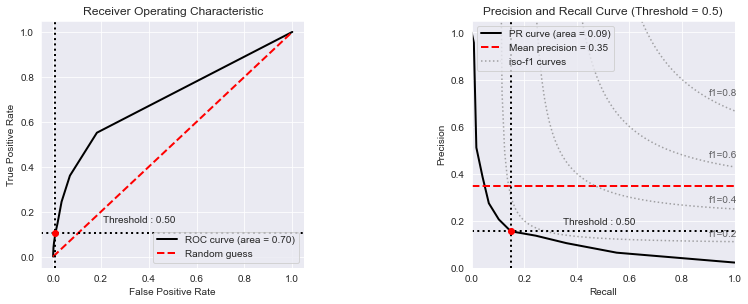

In [19]:
#plots

from plot_metric.functions import BinaryClassification
bc=BinaryClassification(y_test,y_pred_prob,labels=['nonSepsis','Sepsis'])


plt.figure(figsize=(15,10))
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
bc.plot_roc_curve()
plt.subplot2grid(shape=(2,6), loc=(0,3), colspan=2)
bc.plot_precision_recall_curve()
plt.show()

In [20]:
bc.print_report()

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

   nonSepsis       0.98      0.99      0.99    115683
      Sepsis       0.21      0.10      0.14      2635

    accuracy                           0.97    118318
   macro avg       0.59      0.55      0.56    118318
weighted avg       0.96      0.97      0.97    118318



# MODEL-4 XG Application for classification

In [21]:
!pip install xgboost

In [22]:
from xgboost import XGBClassifier
XG_model=XGBClassifier(max_depth=3)

In [23]:
XG_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [24]:
y_pred_xg=XG_model.predict(X_test)
confusion_matrix(y_test,y_pred)


array([[114632,   1051],
       [  2363,    272]], dtype=int64)

# Performance Metrics

In [25]:
y_pred_prob=XG_model.predict_proba(X_test)[:,1]
precison,recall,threshold=precision_recall_curve(y_test,y_pred_xg)
area_under_curve = auc(recall, precison)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xg)
auroc = auc(fpr, tpr)

In [26]:
print(classification_report(y_test,y_pred_xg))
print('f1score:', f1_score(y_test,y_pred_xg))
print('Precision:', precision_score(y_test,y_pred_xg))
print('Recall:', recall_score(y_test,y_pred_xg))
print('accuraccy:', accuracy_score(y_test,y_pred_xg))
print('auc:',auroc)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    115683
           1       0.22      0.04      0.07      2635

    accuracy                           0.98    118318
   macro avg       0.60      0.52      0.53    118318
weighted avg       0.96      0.98      0.97    118318

f1score: 0.07318611987381704
Precision: 0.21682242990654205
Recall: 0.04402277039848197
accuraccy: 0.9751686133977924
auc: 0.5202004017358107


# TESTING MODEL ON VALIDATION SET TRAININGB

In [27]:
setB_validation=pd.read_csv('D:\\Jio Term 2\\ML\ML_Project\\project_data\\sepsis_testB_data.csv')

In [28]:
#we split the data into dependent & independent features & drop the 3 features as dropped while training the model

X_validation_setB = setB_validation[X_feature]
y_validation_setB = setB_validation[y_feature]

In [29]:
X_validation_setB

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS
0,93.0,92.5,36.5,110.0,76.0,56.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,7.8,0.0,1.50,0.0,233.0,0.0,2.1,0.0,3.7,0.0,0.0,35.3,11.3,0.0,10.8,0.0,170.0,73,1,-214.64,1
1,93.0,92.5,36.5,110.0,76.0,56.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,7.8,0.0,1.50,0.0,233.0,0.0,2.1,0.0,3.7,0.0,0.0,35.3,11.3,0.0,10.8,0.0,170.0,73,1,-214.64,2
2,91.0,96.0,36.5,108.0,84.5,72.0,23.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,7.8,0.0,1.50,0.0,233.0,0.0,2.1,0.0,3.7,0.0,0.0,35.3,11.3,0.0,10.8,0.0,170.0,73,1,-214.64,3
3,93.0,98.0,36.5,123.0,87.0,61.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,7.8,0.0,1.50,0.0,233.0,0.0,2.1,0.0,3.7,0.0,0.0,35.3,11.3,0.0,10.8,0.0,170.0,73,1,-214.64,4
4,93.0,95.0,36.5,110.0,81.0,70.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,7.8,0.0,1.50,0.0,233.0,0.0,2.1,0.0,3.7,0.0,0.0,35.3,11.3,0.0,10.8,0.0,170.0,73,1,-214.64,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762014,80.0,96.0,36.4,115.0,87.0,65.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,11.0,75.0,8.9,0.0,0.54,0.1,239.0,0.0,2.2,4.0,3.6,0.9,0.0,37.1,11.6,29.1,5.4,0.0,216.0,62,0,0.00,31
762015,74.0,97.0,36.4,114.0,83.0,67.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,11.0,75.0,8.9,0.0,0.54,0.1,242.0,0.0,2.2,4.0,3.6,0.9,0.0,37.1,11.6,29.1,5.4,0.0,216.0,62,0,0.00,32
762016,78.0,98.0,36.6,110.0,83.0,69.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,11.0,75.0,8.9,0.0,0.54,0.1,242.0,0.0,2.2,4.0,3.6,0.9,0.0,37.1,11.6,29.1,5.4,0.0,216.0,62,0,0.00,33
762017,82.0,99.0,36.6,124.0,91.0,71.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,11.0,75.0,8.9,0.0,0.54,0.1,242.0,0.0,2.2,4.0,3.6,0.9,0.0,37.1,11.6,29.1,5.4,0.0,216.0,62,0,0.00,34


In [30]:
#Of all the models applied Random Forest has given the highest precision score & f1 score , hence we will proceed with random
#forest 


y_pred_setB=rf_classifier.predict(X_validation_setB)

confusion_matrix(y_validation_setB,y_pred_setB)

array([[719774,  31465],
       [  9116,   1664]], dtype=int64)

# Performance on SetB validation data

In [31]:
y_pred_prob_setB=rf_classifier.predict_proba(X_validation_setB)[:,1]
precison,recall,threshold=precision_recall_curve(y_validation_setB,y_pred_setB)
area_under_curve = auc(recall, precison)
fpr, tpr, thresholds = roc_curve(y_validation_setB, y_pred_setB)
auroc = auc(fpr, tpr)

In [32]:
print(classification_report(y_validation_setB,y_pred_setB))
print('f1score:', f1_score(y_validation_setB,y_pred_setB))
print('Precision:', precision_score(y_validation_setB,y_pred_setB))
print('Recall:', recall_score(y_validation_setB,y_pred_setB))
print('accuraccy:', accuracy_score(y_validation_setB,y_pred_setB))
print('auc:',auroc)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97    751239
           1       0.05      0.15      0.08     10780

    accuracy                           0.95    762019
   macro avg       0.52      0.56      0.52    762019
weighted avg       0.97      0.95      0.96    762019

f1score: 0.07579311758409439
Precision: 0.050227897008663105
Recall: 0.15435992578849722
accuraccy: 0.9467454223582351
auc: 0.5562378925278274


Text(0.5, 1.0, 'precision vs recall_randomforest')

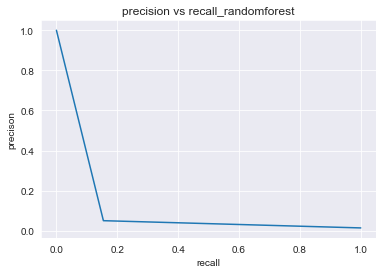

In [33]:
plt.plot(recall,precison)
plt.xlabel('recall')
plt.ylabel('precison')
plt.title('precision vs recall_randomforest')

# PLOT METRICS

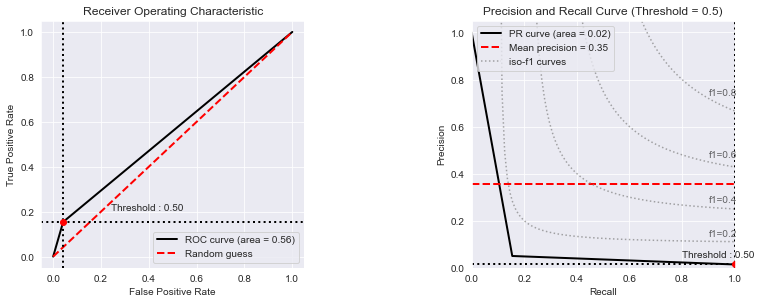

In [34]:
#plots

from plot_metric.functions import BinaryClassification
bc=BinaryClassification(y_validation_setB,y_pred_setB,labels=['nonSepsis','Sepsis'])


plt.figure(figsize=(15,10))
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
bc.plot_roc_curve()
plt.subplot2grid(shape=(2,6), loc=(0,3), colspan=2)
bc.plot_precision_recall_curve()
plt.show()